## Makie Tutorial 

`Makie` is the frontend package that defines all plotting functions. **`Makie.jl` is reexported by every backend, so you don't have to specifically install or import it.**

There are 3 main backends: 

- `GLMakie.jl` - for interactive windows and true 3D rendering but no vector output (?) 
- `CairoMakie.jl` - for rendering vector graphics or high quality 2D images and don't need interactivity or true 3D rendering   
- `WGLMakie.jl` - similar to `GLMakie.jl` but works in web browsers, not native windows 

You can activate any backend by calling the appropriate package and calling its `activate!` function. This tutorial will use `CairoMakie` as an example. This makes all exported symbols from `Makie.jl` available as well: 

In [3]:
using CairoMakie 

### Creating a (blank) Figure 

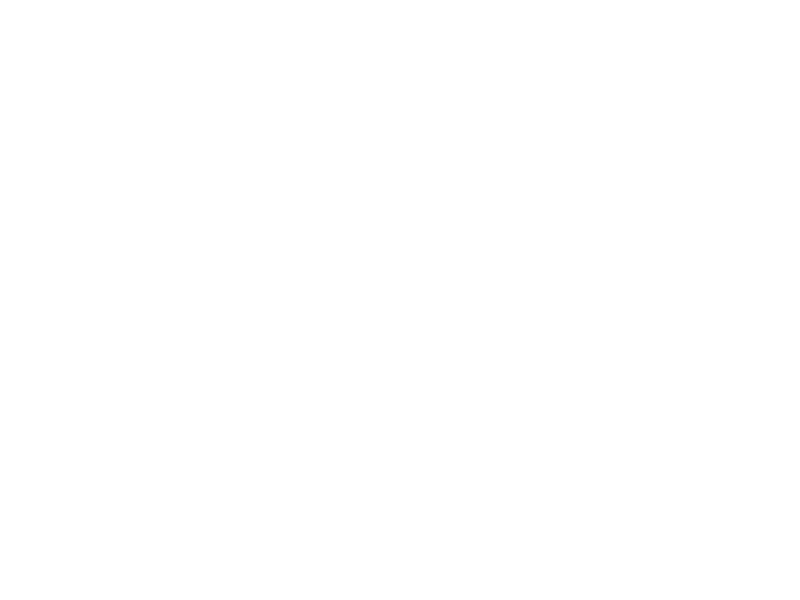

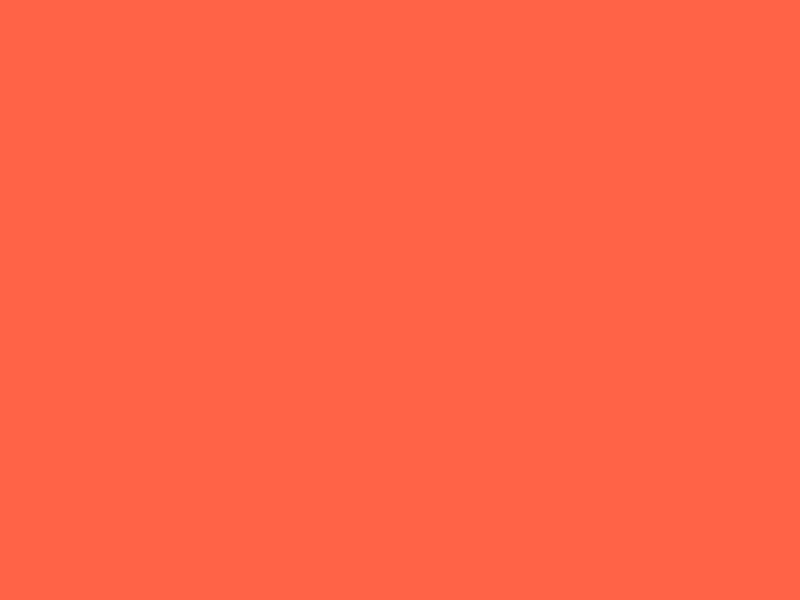

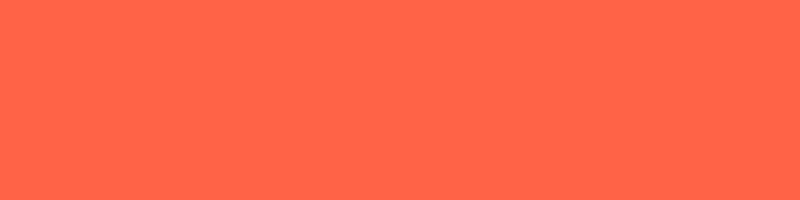

In [118]:
f = Figure()
display(f)  

f2 = Figure(backgroundcolor = :tomato) 
display(f2) 

f3 = Figure(backgroundcolor = :tomato, resolution = (800, 200))
display(f3) 

### Add an axis and plot 

Default axis has no title or labels. Those can be passed in as keyword arguments. 

The usual syntax for adding such an object to a figure is to specify a position in the Figure's layout as the first argument. We'll learn more about layouts later, but for now the position f[1, 1] will just fill the whole figure. 



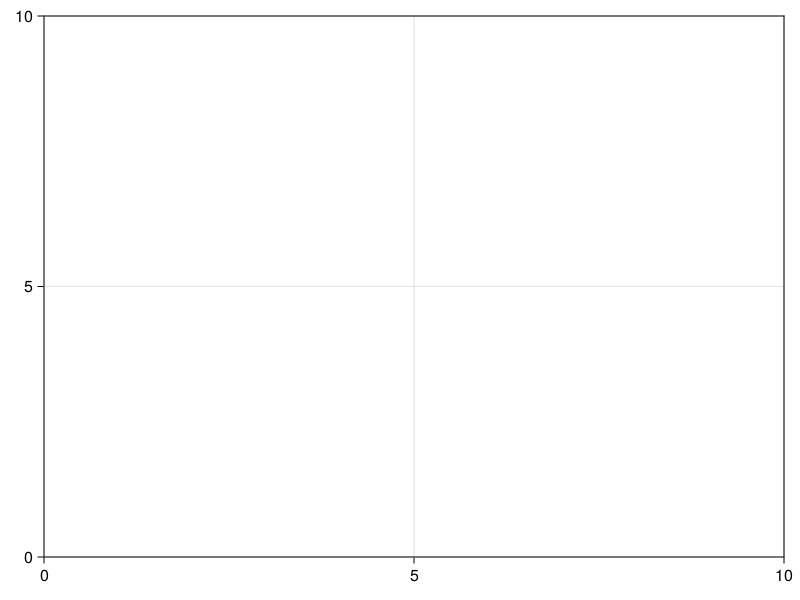

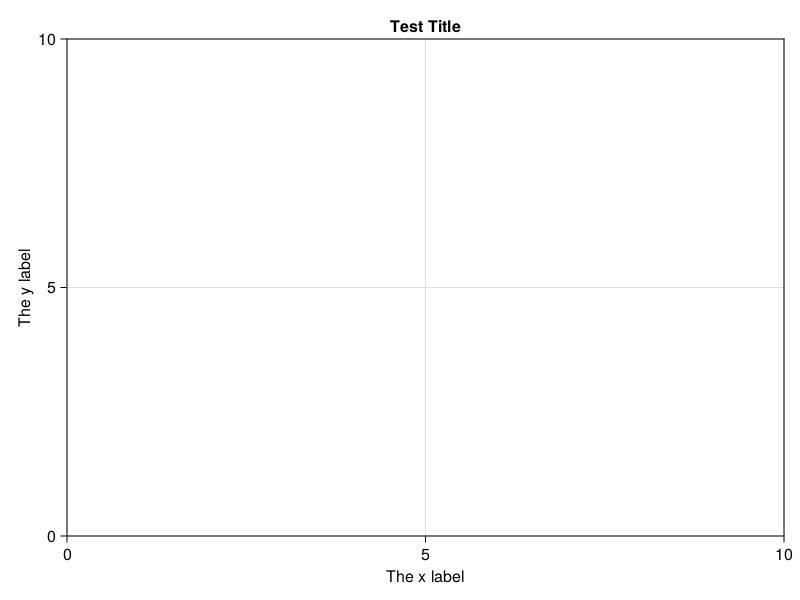

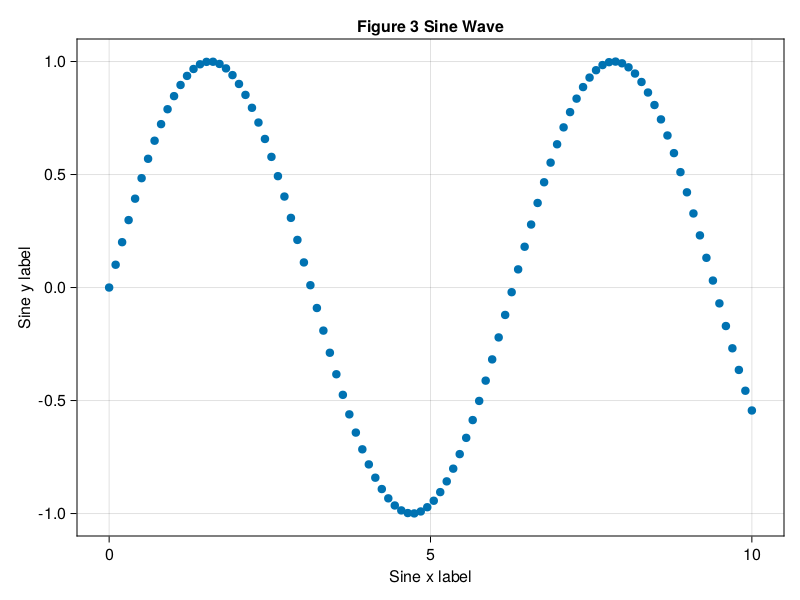

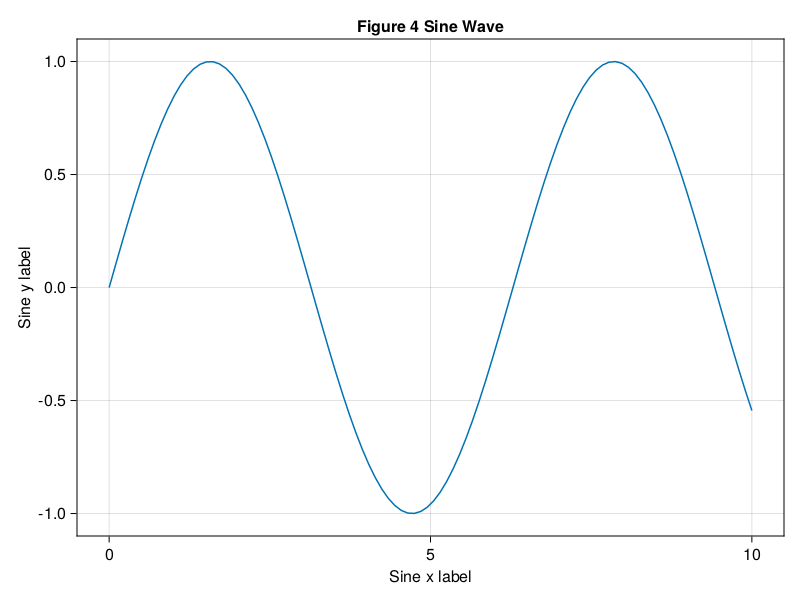

In [21]:
f = Figure() 
ax = Axis(f[1,1]) 
display(f) 

f2 = Figure() 
ax = Axis(
    f2[1,1] , 
    title = "Test Title" , 
    xlabel = "The x label" , 
    ylabel = "The y label" 
    ) 
display(f2) 

f3 = Figure() 
ax = Axis(
    f3[1,1] , 
    title = "Figure 3 Sine Wave" , 
    xlabel = "Sine x label" , 
    ylabel = "Sine y label" 
    ) 
x = range(0, 10, length = 100) 
y = sin.(x) 
scatter!(x,y) 
# lines!(ax, x, y) 
display(f3) 

f4 = Figure() 
ax = Axis(
    f4[1,1] , 
    title = "Figure 4 Sine Wave" , 
    xlabel = "Sine x label" , 
    ylabel = "Sine y label" 
    ) 
x = range(0, 10, length = 100) 
y = sin.(x) 
# plot!(x,y) 
lines!(ax, x, y) 
display(f4) 



### Figure, Axis, and Plot in one call 

Every plotting function comes in a pair: 
1. Plots onto existing `Axis` 
    - `lines!` **mutates** an existing `Axis`  
1. Creates its own existing `Axis` for convenience
    - `lines` creates an implicit one   

#### `lines` function 

Just calling `lines` creates: 
1. a `Figure`
2. an `Axis`
3. and adds a plot of type `Lines` to that axis 

These three objects are created at once. The `lines` function returns all three, just bundled up into one FigureAxisPlot object. 

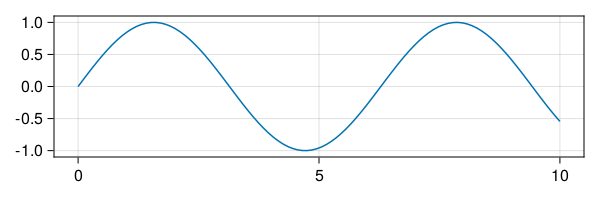

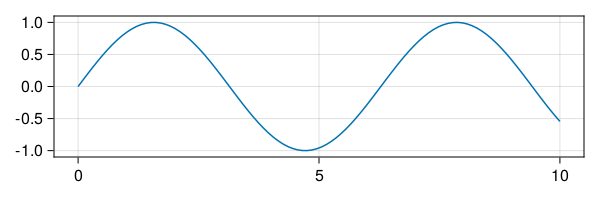

typeof(f) = Makie.FigureAxisPlot
typeof(fig) = Figure


In [116]:
x = range(0, 10, length = 100)
y = sin.(x) 

# Makie FigureAxisPlot object 
f = lines(x,y; figure = ( ; resolution = (600,200) ) )
@show typeof(f) 

# Separating the figure, axis, and plot objects 
fig, axis, line = lines(x,y; figure = ( ; resolution = (600,200) ) ) ; 
@show typeof(fig) 

display(f) 
display(fig) 

### Figure and Axis Styles 

Because a normal plotting function like lines or scatter creates figure objects before it creates the plot, you can pass special keyword arguments to it called `axis` and `figure`. 

You can pass any kind of object with symbol-value pairs and these will be used as keyword arguments for `Figure` and `Axis`, respectively.

The `;` in `(; resolution = (400, 400))` is nothing special, it just clarifies that we want a one-element NamedTuple and **not a variable called resolution**. It's good habit to include it but it's not needed for NamedTuples with more than one entry.

You can modify the figure, plot, axis, and label styles by assigning the figure object to a variable and then specifying the attributes as arguments. 

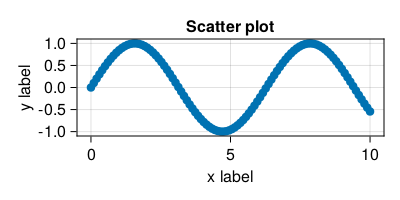

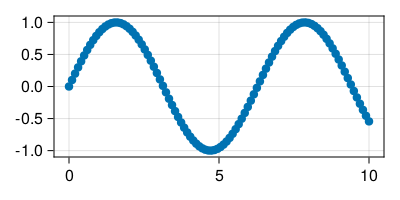

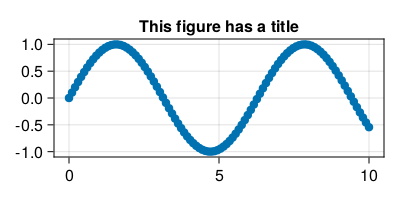

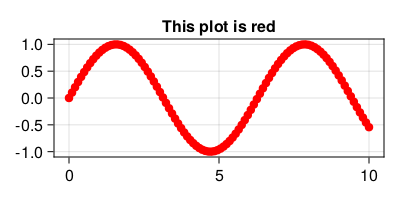

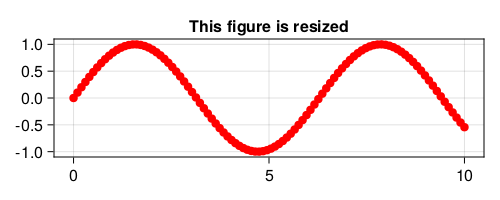

In [114]:
x = range(0, 10, length=100)
y = sin.(x)
f = scatter(x, y;
    figure = (; resolution = (400, 200)),
    axis = (; title = "Scatter plot", 
              xlabel = "x label", 
              ylabel = "y label" )
)
display(f) 

## modify object attributes 
f2 = scatter(x, y; 
    figure = (; resolution = (400, 200))
)
display(f2) 

# assign axis to object and then modify title 
ax = f2.axis 
ax.title = "This figure has a title" 
display(f2) 

# assign the plot to an object and then modify attributes
plt = f2.plot 
plt.color = :red  
ax.title = "This plot is red" 
display(f2) 

# change figure resolution 
fig = f2.figure 
resize!(fig, 500, 200)
ax.title = "This figure is resized" 
display(fig)  



### Argument conversions 

In Makie, the input arguments are converted internally to one or more target representations, e.g.: 
- an interval and a function
  - ` lines(0..10, sin) `
- a collection of numbers and a function: 
  - ` lines(0:1:10, cos)` 
- a collection of points from `GeometryBasics.jl` 
  - ` lines( [ Point(0,0), Point(5,10), Point(10,5) ] ) `  

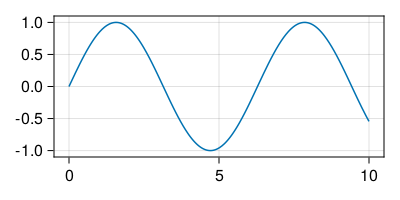

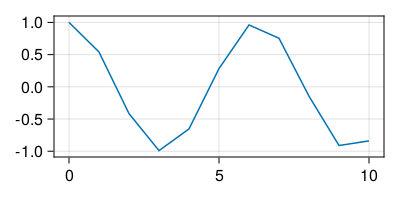

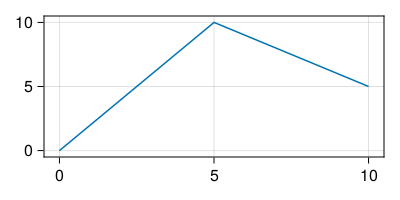

In [113]:
f = lines(0..10, sin)
resize!(f.figure, 400,200) 
display(f) 

f = lines(0:1:10, cos) 
resize!(f.figure, 400,200) 
display(f) 

f = lines( [ Point(0,0), Point(5,10), Point(10,5) ] ) 
resize!(f.figure, 400,200) 
display(f) 

### Layering multiple plots 

To plot more than one thing on the same axis, use the mutating plotting functions 

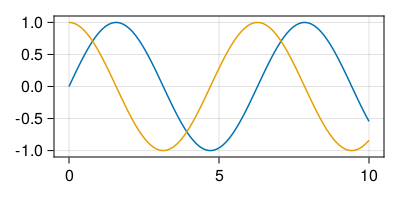

In [110]:
x = range(0, 10, length = 100) 
f, ax, l1 = lines(x, sin; figure = (; resolution = (400,200)) ) 
l2 = lines!(ax, x, cos) 
display(f) 


# you can also leave out the axis argument for convenience, in which the axis being used is the current_axis()

### Attributes 


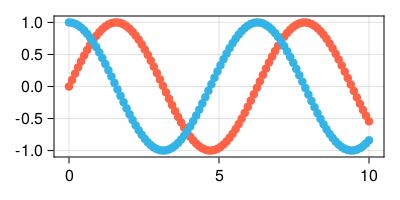

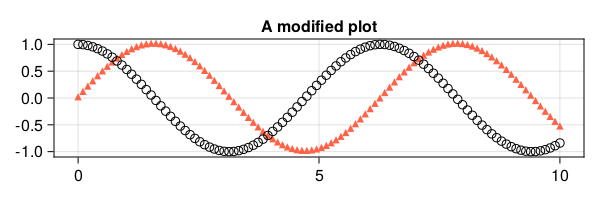

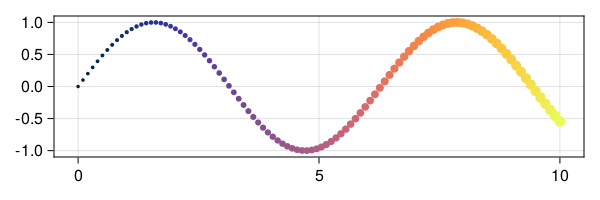

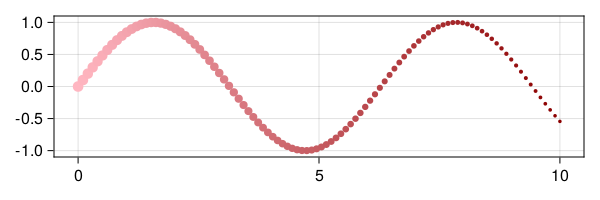

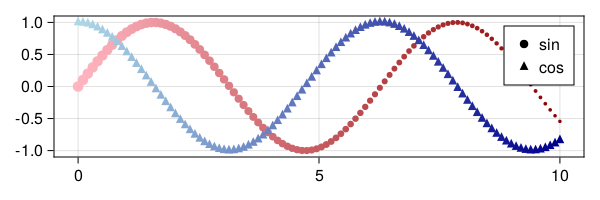

In [159]:
x = range(0, 10, length=100)

# figure, axis, plot 
f, ax, l1 = scatter(x, sin, color = :tomato; 
    figure = (; resolution = (400,200)
    ) )
l2 = scatter!(ax, x, cos, color = RGBf(0.2, 0.7, 0.9))
display(f) 

# let's change some things 
resize!(f, 600, 200) 
ax.title = "A modified plot"
l1.marker = :utriangle 
l1.markersize = 10 
l2.strokewidth = 1 
l2.color = :transparent 
display(f) 

# use arrays to vary markersize and color 
f2 = scatter(x, sin,
    markersize = range(5, 15, length=100),
    color = range(0, 1, length=100),
    colormap = :thermal ; 
    figure = ( ; resolution = (600,200) )
)
display(f2) 
f2_pl1 = f2.plot
f2_pl1.markersize = range(15,5,length = 100)
f2_pl1.colormap = :reds ; 
display(f2) 

# add a legend! 
f2_pl2 = scatter!(x, cos, 
    marker = :utriangle, 
    label = "cos", 
    color = range(0, 1, length = 100) 
    )
f2_pl2.colormap = :blues  
f2_pl1.label = "sin" 
axislegend() 
display(f2) 
# current_figure() 



### Subplots 

The basic syntax for specifying location in a figure is: 

` fig[row, col] `

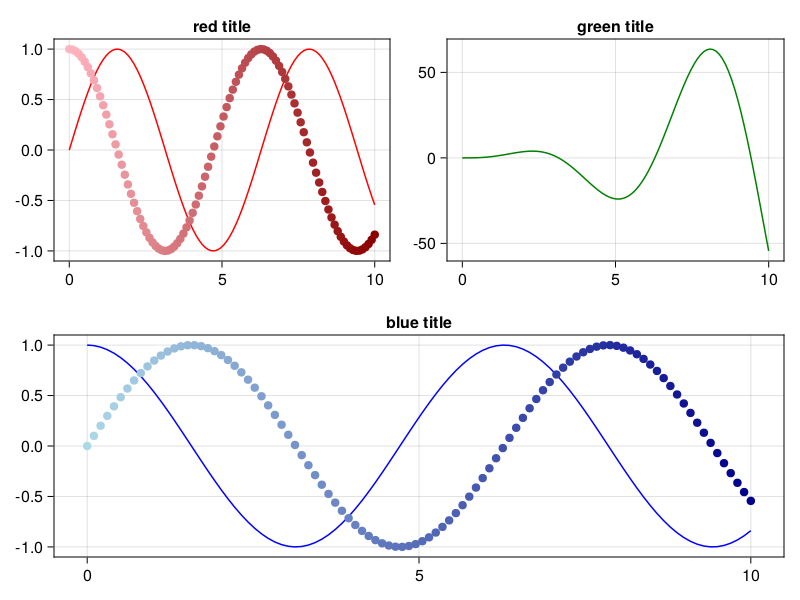

In [189]:
x = LinRange(0, 10, 100) 
y = sin.(x) 

fig = Figure( resolution = (800,600) ) 
red = lines( fig[1,1], x, sin, color = :red )
green = lines( fig[1,2], x, x.^2 .* sin.(x), color = :green  ) 
blue = lines( fig[2,1:2], x, cos, color = :blue )

red.axis.title = "red title" 
green.axis.title = "green title" 
blue.axis.title = "blue title" 

red2 = scatter!( red.axis, x, cos, 
    color = range(0,1,length = 100), 
    colormap = :reds )

blue2 = scatter!( blue.axis, x, sin )
blue2.color = range(0,1,length = 100)
blue2.colormap = :blues 

display(fig) 